# Sentinel-1 GRD Multi-Band Polarization Support

This notebook demonstrates the **multi-band polarization feature** for Sentinel-1 GRD products in the EOPFZARR driver.

## Overview

Sentinel-1 GRD products with dual polarization (VV/VH or HH/HV) are automatically combined into a single multi-band dataset for easier access.

### Key Features:
- **Automatic Detection**: GRD products are automatically detected by the `_GRD` pattern in the path
- **Multi-band Output**: VV/VH or HH/HV polarizations are combined into Band 1 and Band 2
- **Band Descriptions**: Bands are labeled with their polarization (VV, VH, HH, HV)
- **Optional Disable**: Use `GRD_MULTIBAND=NO` open option to access individual subdatasets

### Datasets Used:
- **VV/VH Product**: S1C_IW_GRDH (Interferometric Wide mode, High resolution)
- **HH/HV Product**: S1A_EW_GRDM (Extra Wide mode, Medium resolution)

## 1. Setup and Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from osgeo import gdal

# Enable GDAL exceptions
gdal.UseExceptions()

print("Imports successful!")
print(f"GDAL version: {gdal.__version__}")

# Check driver registration
drv = gdal.GetDriverByName('EOPFZARR')
if drv:
    print(f"EOPFZARR driver: Registered")
else:
    print("WARNING: EOPFZARR driver not found!")

Imports successful!
GDAL version: 3.11.1
EOPFZARR driver: Registered


## 2. Dataset URLs

We'll demonstrate with two types of dual-polarization GRD products:
- **VV/VH**: Common for land applications
- **HH/HV**: Common for ice/snow applications

In [2]:
# VV/VH dual polarization GRD product
GRD_VV_VH_URL = (
    "/vsicurl/https://objects.eodc.eu/e05ab01a9d56408d82ac32d69a5aae2a:"
    "202602-s01siwgrh-global/05/products/cpm_v262/"
    "S1C_IW_GRDH_1SDV_20260205T120122_20260205T120158_006220_00C7E4_5D6E.zarr"
)

# HH/HV dual polarization GRD product
GRD_HH_HV_URL = (
    "/vsicurl/https://objects.eodc.eu/e05ab01a9d56408d82ac32d69a5aae2a:"
    "202602-s01sewgrm-global/05/products/cpm_v262/"
    "S1A_EW_GRDM_1SDH_20260205T132815_20260205T132849_063084_07EADA_F486.zarr"
)

print("Dataset URLs configured:")
print(f"\n1. VV/VH Product (IW mode):")
print(f"   S1C_IW_GRDH_1SDV - Interferometric Wide, High resolution, Dual VV/VH")
print(f"\n2. HH/HV Product (EW mode):")
print(f"   S1A_EW_GRDM_1SDH - Extra Wide, Medium resolution, Dual HH/HV")

Dataset URLs configured:

1. VV/VH Product (IW mode):
   S1C_IW_GRDH_1SDV - Interferometric Wide, High resolution, Dual VV/VH

2. HH/HV Product (EW mode):
   S1A_EW_GRDM_1SDH - Extra Wide, Medium resolution, Dual HH/HV


## 3. Open VV/VH Dual Polarization Product

When opening a GRD product with dual polarization, the driver automatically creates a 2-band dataset.

In [3]:
print("Opening VV/VH GRD product...\n")

# Open with default settings (GRD_MULTIBAND=YES)
ds_vvvh = gdal.Open(f"EOPFZARR:'{GRD_VV_VH_URL}'")

if ds_vvvh is None:
    print("Failed to open dataset!")
else:
    print("Dataset opened successfully!\n")
    print("=" * 70)
    print("Dataset Information:")
    print("=" * 70)
    print(f"Description: {ds_vvvh.GetDescription()}")
    print(f"Dimensions:  {ds_vvvh.RasterXSize} x {ds_vvvh.RasterYSize} pixels")
    print(f"Band Count:  {ds_vvvh.RasterCount}")
    
    print("\nBand Details:")
    print("-" * 70)
    for i in range(1, ds_vvvh.RasterCount + 1):
        band = ds_vvvh.GetRasterBand(i)
        print(f"  Band {i}: {band.GetDescription()}")
        print(f"           Data Type: {gdal.GetDataTypeName(band.DataType)}")
        print(f"           Block Size: {band.GetBlockSize()}")
    
    print("\nMetadata:")
    print("-" * 70)
    print(f"  EOPF_MULTIBAND:    {ds_vvvh.GetMetadataItem('EOPF_MULTIBAND')}")
    print(f"  EOPF_PRODUCT_TYPE: {ds_vvvh.GetMetadataItem('EOPF_PRODUCT_TYPE')}")
    print(f"  EOPF_POLARIZATIONS: {ds_vvvh.GetMetadataItem('EOPF_POLARIZATIONS')}")
    print("=" * 70)

Opening VV/VH GRD product...

Dataset opened successfully!

Dataset Information:
Description: EOPFZARR_GRD:VV+VH
Dimensions:  25157 x 24285 pixels
Band Count:  2

Band Details:
----------------------------------------------------------------------
  Band 1: VV
           Data Type: UInt16
           Block Size: [4096, 2048]
  Band 2: VH
           Data Type: UInt16
           Block Size: [4096, 2048]

Metadata:
----------------------------------------------------------------------
  EOPF_MULTIBAND:    YES
  EOPF_PRODUCT_TYPE: GRD
  EOPF_POLARIZATIONS: VV,VH


## 4. Open HH/HV Dual Polarization Product

In [4]:
print("Opening HH/HV GRD product...\n")

ds_hhhv = gdal.Open(f"EOPFZARR:'{GRD_HH_HV_URL}'")

if ds_hhhv is None:
    print("Failed to open dataset!")
else:
    print("Dataset opened successfully!\n")
    print("=" * 70)
    print("Dataset Information:")
    print("=" * 70)
    print(f"Description: {ds_hhhv.GetDescription()}")
    print(f"Dimensions:  {ds_hhhv.RasterXSize} x {ds_hhhv.RasterYSize} pixels")
    print(f"Band Count:  {ds_hhhv.RasterCount}")
    
    print("\nBand Details:")
    print("-" * 70)
    for i in range(1, ds_hhhv.RasterCount + 1):
        band = ds_hhhv.GetRasterBand(i)
        print(f"  Band {i}: {band.GetDescription()}")
        print(f"           Data Type: {gdal.GetDataTypeName(band.DataType)}")
    
    print("\nMetadata:")
    print("-" * 70)
    print(f"  EOPF_MULTIBAND:    {ds_hhhv.GetMetadataItem('EOPF_MULTIBAND')}")
    print(f"  EOPF_PRODUCT_TYPE: {ds_hhhv.GetMetadataItem('EOPF_PRODUCT_TYPE')}")
    print(f"  EOPF_POLARIZATIONS: {ds_hhhv.GetMetadataItem('EOPF_POLARIZATIONS')}")
    print("=" * 70)

Opening HH/HV GRD product...

Dataset opened successfully!

Dataset Information:
Description: EOPFZARR_GRD:HH+HV
Dimensions:  10500 x 5630 pixels
Band Count:  2

Band Details:
----------------------------------------------------------------------
  Band 1: HH
           Data Type: UInt16
  Band 2: HV
           Data Type: UInt16

Metadata:
----------------------------------------------------------------------
  EOPF_MULTIBAND:    YES
  EOPF_PRODUCT_TYPE: GRD
  EOPF_POLARIZATIONS: HH,HV


## 5. Read and Compare Polarization Data

Let's read data from both VV and VH bands and compare them.

In [5]:
if ds_vvvh:
    print("Reading VV/VH data subset...\n")
    
    # Read a subset from center of image
    x_off = ds_vvvh.RasterXSize // 2 - 500
    y_off = ds_vvvh.RasterYSize // 2 - 500
    x_size = 1000
    y_size = 1000
    
    # Ensure we don't go out of bounds
    x_size = min(x_size, ds_vvvh.RasterXSize - x_off)
    y_size = min(y_size, ds_vvvh.RasterYSize - y_off)
    
    print(f"Reading region: offset=({x_off}, {y_off}), size=({x_size}, {y_size})")
    
    # Read VV (Band 1)
    vv_data = ds_vvvh.GetRasterBand(1).ReadAsArray(x_off, y_off, x_size, y_size)
    print(f"\nVV Band:")
    print(f"  Shape: {vv_data.shape}")
    print(f"  Data type: {vv_data.dtype}")
    print(f"  Min: {vv_data.min()}, Max: {vv_data.max()}, Mean: {vv_data.mean():.2f}")
    
    # Read VH (Band 2)
    vh_data = ds_vvvh.GetRasterBand(2).ReadAsArray(x_off, y_off, x_size, y_size)
    print(f"\nVH Band:")
    print(f"  Shape: {vh_data.shape}")
    print(f"  Data type: {vh_data.dtype}")
    print(f"  Min: {vh_data.min()}, Max: {vh_data.max()}, Mean: {vh_data.mean():.2f}")
    
    # Check they are different
    if np.array_equal(vv_data, vh_data):
        print("\nWARNING: VV and VH data are identical!")
    else:
        print(f"\nVV and VH bands contain different data (as expected)")
else:
    print("Dataset not available")

Reading VV/VH data subset...

Reading region: offset=(12078, 11642), size=(1000, 1000)

VV Band:
  Shape: (1000, 1000)
  Data type: uint16
  Min: 23, Max: 3283, Mean: 212.70

VH Band:
  Shape: (1000, 1000)
  Data type: uint16
  Min: 13, Max: 847, Mean: 99.95

VV and VH bands contain different data (as expected)


## 6. Visualize Polarization Comparison

VV and VH polarizations respond differently to surface features:
- **VV**: Vertical transmit, Vertical receive - sensitive to surface roughness
- **VH**: Vertical transmit, Horizontal receive - sensitive to volume scattering (vegetation)

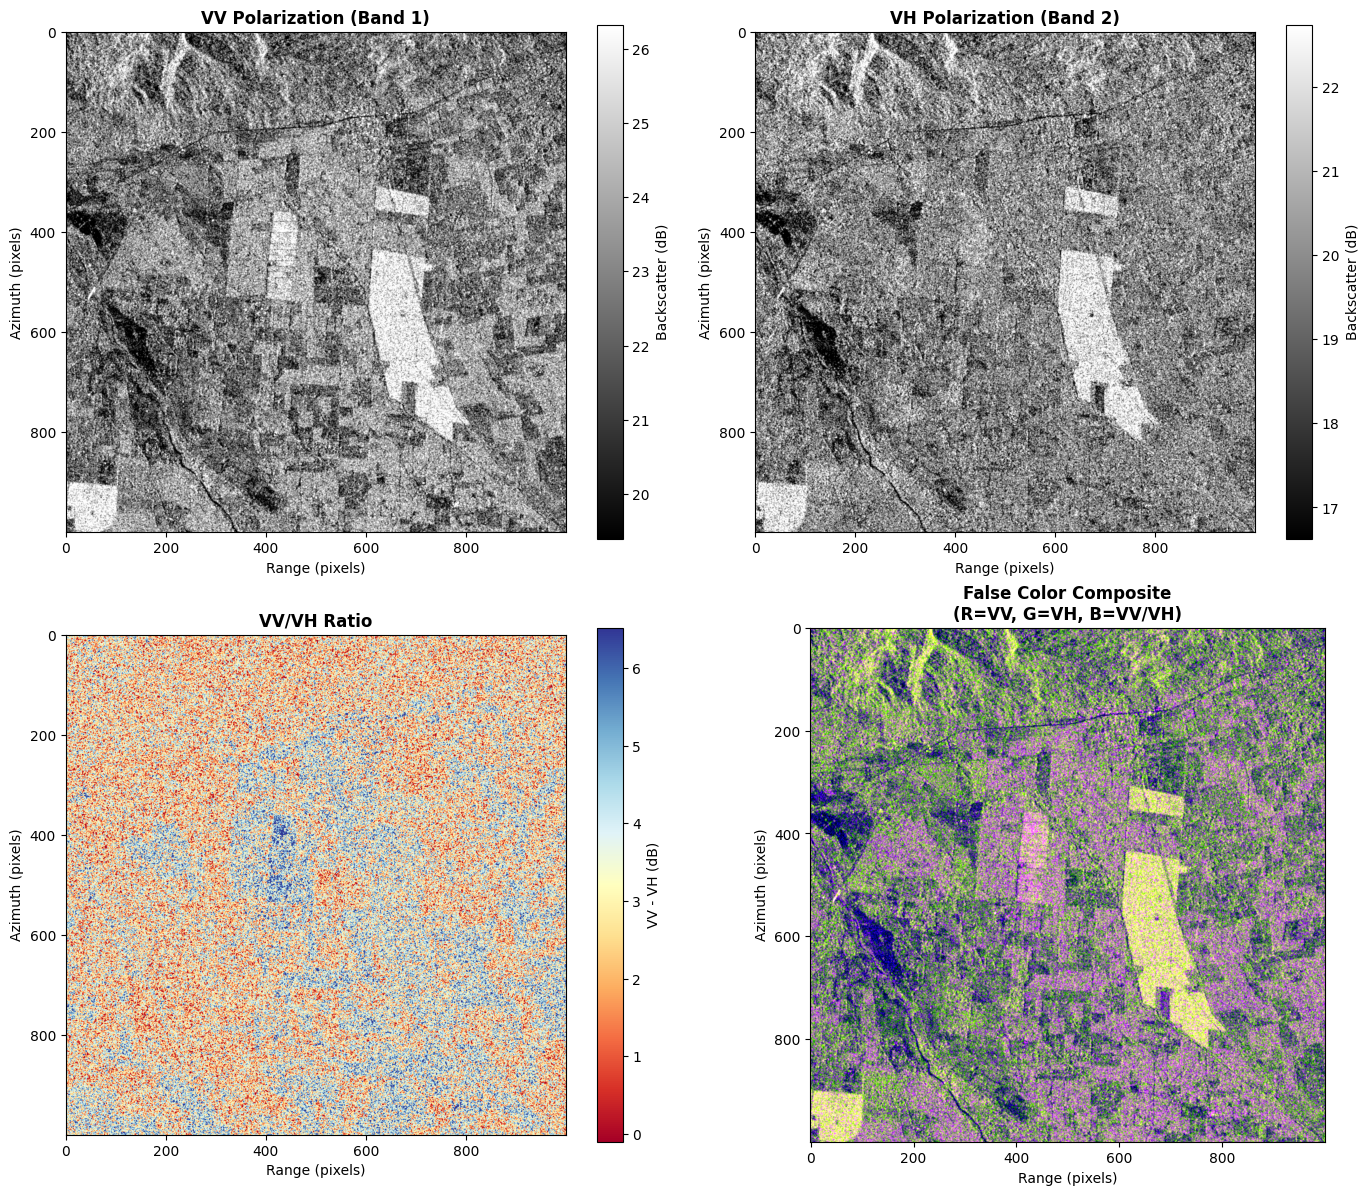

Visualization complete!

Interpretation:
- VV: Sensitive to surface roughness and moisture
- VH: Sensitive to volume scattering (vegetation, forest)
- VV/VH Ratio: High values = bare/urban, Low values = vegetation


In [6]:
if 'vv_data' in dir() and 'vh_data' in dir():
    # Convert to dB scale for visualization
    def to_db(data):
        data_float = data.astype(np.float32)
        data_float[data_float == 0] = np.nan
        return 10 * np.log10(data_float + 1)
    
    vv_db = to_db(vv_data)
    vh_db = to_db(vh_data)
    
    # Calculate VV/VH ratio (useful for classification)
    with np.errstate(divide='ignore', invalid='ignore'):
        ratio_db = vv_db - vh_db  # In dB, subtraction = ratio
    
    # Create figure
    fig, axes = plt.subplots(2, 2, figsize=(14, 12))
    
    # VV
    vmin, vmax = np.nanpercentile(vv_db, [2, 98])
    im1 = axes[0, 0].imshow(vv_db, cmap='gray', vmin=vmin, vmax=vmax)
    axes[0, 0].set_title('VV Polarization (Band 1)', fontsize=12, fontweight='bold')
    axes[0, 0].set_xlabel('Range (pixels)')
    axes[0, 0].set_ylabel('Azimuth (pixels)')
    plt.colorbar(im1, ax=axes[0, 0], label='Backscatter (dB)')
    
    # VH
    vmin, vmax = np.nanpercentile(vh_db, [2, 98])
    im2 = axes[0, 1].imshow(vh_db, cmap='gray', vmin=vmin, vmax=vmax)
    axes[0, 1].set_title('VH Polarization (Band 2)', fontsize=12, fontweight='bold')
    axes[0, 1].set_xlabel('Range (pixels)')
    axes[0, 1].set_ylabel('Azimuth (pixels)')
    plt.colorbar(im2, ax=axes[0, 1], label='Backscatter (dB)')
    
    # VV/VH Ratio
    vmin, vmax = np.nanpercentile(ratio_db, [2, 98])
    im3 = axes[1, 0].imshow(ratio_db, cmap='RdYlBu', vmin=vmin, vmax=vmax)
    axes[1, 0].set_title('VV/VH Ratio', fontsize=12, fontweight='bold')
    axes[1, 0].set_xlabel('Range (pixels)')
    axes[1, 0].set_ylabel('Azimuth (pixels)')
    plt.colorbar(im3, ax=axes[1, 0], label='VV - VH (dB)')
    
    # False Color Composite (VV=Red, VH=Green, VV/VH=Blue)
    def normalize(data):
        vmin, vmax = np.nanpercentile(data, [2, 98])
        return np.clip((data - vmin) / (vmax - vmin), 0, 1)
    
    rgb = np.stack([
        normalize(vv_db),
        normalize(vh_db),
        normalize(ratio_db)
    ], axis=-1)
    rgb = np.nan_to_num(rgb, nan=0)
    
    axes[1, 1].imshow(rgb)
    axes[1, 1].set_title('False Color Composite\n(R=VV, G=VH, B=VV/VH)', fontsize=12, fontweight='bold')
    axes[1, 1].set_xlabel('Range (pixels)')
    axes[1, 1].set_ylabel('Azimuth (pixels)')
    
    plt.tight_layout()
    plt.show()
    
    print("Visualization complete!")
    print("\nInterpretation:")
    print("- VV: Sensitive to surface roughness and moisture")
    print("- VH: Sensitive to volume scattering (vegetation, forest)")
    print("- VV/VH Ratio: High values = bare/urban, Low values = vegetation")
else:
    print("Data not available for visualization")

## 7. Disable Multi-Band Mode

If you need to access individual polarization subdatasets separately, use the `GRD_MULTIBAND=NO` open option.

In [7]:
print("Opening with GRD_MULTIBAND=NO...\n")

ds_standard = gdal.OpenEx(
    f"EOPFZARR:'{GRD_VV_VH_URL}'",
    gdal.OF_RASTER | gdal.OF_READONLY,
    open_options=["GRD_MULTIBAND=NO"]
)

if ds_standard:
    print("Dataset opened in standard mode\n")
    print(f"Band Count: {ds_standard.RasterCount}")
    print(f"EOPF_MULTIBAND: {ds_standard.GetMetadataItem('EOPF_MULTIBAND')}")
    
    # List subdatasets
    subdatasets = ds_standard.GetMetadata("SUBDATASETS")
    if subdatasets:
        print("\nAvailable Subdatasets:")
        print("-" * 70)
        
        grd_subdatasets = []
        for key, value in sorted(subdatasets.items()):
            if "_NAME" in key and "measurements/grd" in value:
                grd_subdatasets.append(value)
        
        print(f"\nGRD Measurement Subdatasets ({len(grd_subdatasets)}):")
        for sd in grd_subdatasets:
            # Extract polarization from path
            if '_VV/' in sd:
                pol = 'VV'
            elif '_VH/' in sd:
                pol = 'VH'
            elif '_HH/' in sd:
                pol = 'HH'
            elif '_HV/' in sd:
                pol = 'HV'
            else:
                pol = '?'
            print(f"  [{pol}] {sd.split('":/')[1] if '":/' in sd else sd}")
    
    ds_standard = None
else:
    print("Failed to open dataset")

Opening with GRD_MULTIBAND=NO...

Dataset opened in standard mode

Band Count: 0
EOPF_MULTIBAND: None

Available Subdatasets:
----------------------------------------------------------------------

GRD Measurement Subdatasets (2):
  [VH] S01SIWGRD_20260205T120122_0036_C036_5D6E_00C7E4_VH/measurements/grd
  [VV] S01SIWGRD_20260205T120122_0036_C036_5D6E_00C7E4_VV/measurements/grd


## 8. Summary

### Multi-Band GRD Support Features

| Feature | Description |
|---------|-------------|
| **Auto-Detection** | GRD products detected by `_GRD` pattern in path |
| **Polarization Combining** | VV+VH or HH+HV combined into 2-band dataset |
| **Band Descriptions** | Bands labeled with polarization (VV, VH, HH, HV) |
| **Metadata** | `EOPF_MULTIBAND=YES`, `EOPF_POLARIZATIONS=VV,VH` |
| **Data Type** | UInt16 (GRD amplitude data) |
| **Disable Option** | `GRD_MULTIBAND=NO` for individual subdataset access |

### Usage Examples

```python
# Default: Multi-band mode (2 bands: VV+VH or HH+HV)
ds = gdal.Open("EOPFZARR:'/vsicurl/...GRD...product.zarr'")
vv_data = ds.GetRasterBand(1).ReadAsArray()  # VV
vh_data = ds.GetRasterBand(2).ReadAsArray()  # VH

# Disable multi-band for individual subdataset access
ds = gdal.OpenEx("EOPFZARR:'/vsicurl/...'", open_options=["GRD_MULTIBAND=NO"])
subdatasets = ds.GetMetadata("SUBDATASETS")
```

### Applications

- **Land Cover Classification**: VV/VH ratio distinguishes vegetation from bare soil
- **Change Detection**: Compare multi-temporal polarimetric signatures
- **Flood Mapping**: Low backscatter in both polarizations indicates water
- **Forest Monitoring**: VH sensitive to forest biomass and structure

## 9. Cleanup

In [8]:
# Close datasets
if 'ds_vvvh' in dir() and ds_vvvh:
    ds_vvvh = None
if 'ds_hhhv' in dir() and ds_hhhv:
    ds_hhhv = None

print("All datasets closed")

All datasets closed
